<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 1 A* addendum
***

This practicum is due on Canvas by **11:59 PM on Monday November 2**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.  We will happily discuss ideas on your paper, however.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Sahib Bajwa

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Short Paper](#p2) | [Bottom](#bot)

---

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Part 1: The Traveling Salesman

Run the following cell to generate the data set, which is saved in the `df` dataframe by default.  You may change it to a dictionary/matrix/whatever typing you see fit.  The x and y axis are in miles, and you may assume that any pairwise distances computed are Euclidean distance

            x          y
0   12.668056   1.007064
1   15.389106  -0.502273
2   14.206290  -0.150340
3   13.726624   0.111160
4   15.305368  -0.196049
5   14.763910   0.446853
6   11.458259   0.931462
7   15.185711  -0.843389
8   12.280708   0.775716
9   12.968540   0.037962
10  13.564273   0.970785
11  15.235982   0.578433
12  14.990878  -1.050833
13  15.188518  -1.418438
14  14.450525   2.384275
15  15.521451  -0.088087
16  14.259718   0.952237
17  15.675474  -0.352312
18  13.412437  -1.446549
19  14.210589  -0.569711
0   -0.185838  19.328680
1    0.125472  20.094573
2   -0.178748  19.775577
3   -1.140249  19.481515
4   -1.717893  19.397538
5    0.514302  21.500275
6    0.342375  20.005490
7    1.879543  22.294586
8    1.669368  22.142328
9    0.264218  20.033324
10  -0.332684  20.389978
11  -0.499643  19.188869
0   10.621877  10.621877
1    9.592413   9.592413
2    9.536151   9.536151
3    9.573996   9.573996
4    9.240214   9.240214
5   10.089272  10.089272
6   10.818885  10.818885


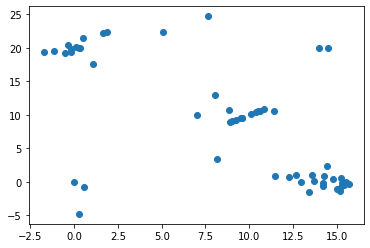

In [41]:
np.random.seed(3202)

d=np.random.multivariate_normal([14,0], [[1,0],[0,1]],20)
d2=np.random.multivariate_normal([0,20], [[1,.8],[.8,1]],12)
d3=np.random.multivariate_normal([10,10], [[1,1],[1,1]],12)
d4=[[14,20], [0,0], [7,10]]
d5={'x': np.random.random(size=10)*(20)-3, 'y': np.random.random(size=10)*30-5}
df=pd.DataFrame(data=d, columns=['x','y'])
df = df.append(pd.DataFrame(data=d2, columns=['x','y']))
df = df.append(pd.DataFrame(data=d3, columns=['x','y']))
df = df.append(pd.DataFrame(data=d4, columns=['x','y']))
df = df.append(pd.DataFrame(data=d5, columns=['x','y']))
plt.scatter(df['x'],df['y'])
print(df)

### Part A) Warmup: Rehash on A*


Turn the set of points into a graph by adding edges.  For each point, add two edges that connect that point two the nearest two other points.  Note that some points might end up with more than 3 edges, but many edges won't have to be added because nearest-other-points will often be symmetric.  After doing this, perform the $A^*$ algorithm to find the shortest path from the point at (0,0) to the point at (14,20).  Print out the path followed (as a list of coordinate pairs) and the total Euclidean distance.

Note: you probably want:
    - i) a quick function or dictionary or matrix that stores or computes the distances between two input points
    - ii) a function that computes the total distance of a path: given a list of nodes/vertices, uses the i) function to compute it's total edge cost
    
## Addendum:
Add an extra connection between the nodes indexed 0 and 45 (coordinates [12.66805621  1.00706433] to [0. 0.]).

Add an extra connection between the nodes indexed 29 and 45 (coordinates[ 0.2642182  20.03332445] to [0. 0.]).

Your graph should appear the following after those additions:

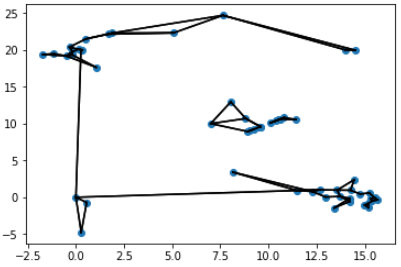

Rubric for your perusal:

A* section (10 total, all extra credit):
- 5 points for proper adjacency and setup
- 5 points for working A*, can rely heavily on HW implementation

Salesman/annealing section (50, +5 extra credit):

- 5 (part A/B): points for setting up reusable/dynamic distance calculations/function
- 5 (part B): ALL candidate paths hit every node exactly once (may or may not return to origin)
- 4 (part B): Temperature maps to changes in paths
- 4 (part B): Exposition to describe Temperature candidate functions in words/graphs/etc.
- 4 (part B): Has a Prob(accept) function decaying with temperature, increasing with "path quality."  Path quality metric must be described.
- 4 (part B): Discussed process for multiple ways to vary temperature/path randomization
- 4 (part B): Tied it all together: implemented multiple runs for best paths
- 10 (part C): Visualizations of results
- 10 (part C): Discussion of results in terms of both how good the paths do/look and depending on temperatures
- 5: Exra credit for part D


In [195]:
import math
import heapq

#Distance calculating function
distanceDict = {}

def get_distance(data1, data2):
    points = zip(data1, data2)
    diffs_squared_distance = [pow(a - b, 2) for (a, b) in points]
    return math.sqrt(sum(diffs_squared_distance))

# print(df.count()[0])
# print(len(df.index))

# print(df.iloc[0][0])

#add edges
#create edge dictionary?

for x in range(df.count()[0]):
    
    itemDict = {}
    smallestDict = {}
    
#     print(x)

    for y in range(df.count()[0]):
        
#         print((df.iloc[x][0], df.iloc[x][1]), (df.iloc[y][0], df.iloc[y][1]))
#         x = ((df.iloc[x][0], df.iloc[x][1]), (df.iloc[y][0], df.iloc[y][1]))
#         print(get_distance((df.iloc[x][0], df.iloc[x][1]), (df.iloc[y][0], df.iloc[y][1])))

        itemDict[y] = (get_distance((df.iloc[x][0], df.iloc[x][1]), (df.iloc[y][0], df.iloc[y][1])))
    
#     print(itemDict)

    mkey0 = min(itemDict, key = itemDict.get)
    mval0 = min(itemDict.values())
    
    del itemDict[mkey0]
    
    mkey1 = min(itemDict, key = itemDict.get)
    mval1 = min(itemDict.values())
    
    del itemDict[mkey1]
    
    mkey2 = min(itemDict, key = itemDict.get)
    mval2 = min(itemDict.values())
    
    smallestDict[mkey1] = mval1
    smallestDict[mkey2] = mval2
    
    if(x == 0):
        mkey3 = 45
        mval3 = get_distance((df.iloc[0][0], df.iloc[0][1]), (df.iloc[45][0], df.iloc[45][1]))
        
        smallestDict[mkey3] = mval3
        
    if(x == 45):
        mkey4 = 0
        mval4 = get_distance((df.iloc[45][0], df.iloc[45][1]), (df.iloc[0][0], df.iloc[0][1]))
        
        smallestDict[mkey4] = mval4
        
    if(x == 29):
        mkey5 = 45
        mval5 = get_distance((df.iloc[29][0], df.iloc[29][1]), (df.iloc[45][0], df.iloc[45][1]))
        
        smallestDict[mkey5] = mval5

    if(x == 45):
        mkey6 = 29
        mval6 = get_distance((df.iloc[45][0], df.iloc[45][1]), (df.iloc[29][0], df.iloc[29][1]))
        
        smallestDict[mkey6] = mval6
        
    distanceDict[x] = smallestDict
        
# print(distanceDict)

# Implement A* Search from Homework 2

def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs[path[s]][path[s+1]]
    return cost

class Frontier_PQ:
    
    def __init__(self, start, cost):
        
        self.start = start
        self.cost = cost
        self.states = {}
        self.q = []
        
        self.add(start, cost)
        
    def add(self, state, cost):
        
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        
        (cost, state) = heapq.heappop(self.q)
        return (cost, state)

    def replace(self, state, cost):
        
        for i, (last, bef) in self.q:
            
            if (bef == state):
                if(last > cost):
                    self.q[i] = (cost, state)
                
        return
    
def astar_search(start, goal, state_graph, return_cost = False, return_nexp = False):
    
    x = 0
    next_check = Frontier_PQ(start, 0)
    passed_list = {start : None}
    realpassed = {}
    x = 0

    while (next_check):
        city_state = next_check.pop()
        print(city_state)
        x = x + 1
        
        if (city_state[1] == goal):
            
            if (return_cost):
                
                if (return_nexp):
                    return (path(passed_list, city_state[1]), pathcost(path(passed_list, city_state[1]), state_graph), x)
                
                else:
                    return (path(passed_list, city_state[1]), pathcost(path(passed_list, city_state[1]), state_graph))
                
            else:
                
                if (return_nexp):
                    return (path(passed_list, city_state[1]), x)
                
                else:
                    return path(passed_list, city_state[1])
                
        realpassed[city_state[1]] = pathcost(path(passed_list, city_state[1]), state_graph)
        
        for revolvstate in (state_graph[city_state[1]]):
            
            nef = realpassed[city_state[1]] + state_graph[city_state[1]][revolvstate]
            
            if (revolvstate not in realpassed):
                if (revolvstate not in next_check.states):
                    next_check.add(revolvstate, nef)
                    passed_list[revolvstate] = city_state[1]
                
            else:
                if (revolvstate in next_check.states):
                    if (next_check.states[revolvstate] > nef):
                        next_check.replace(revolvstate, nef)
                        passed_list[revolvstate] = city_state[1]

#do A*

# print(df.head(57))
# 44 is 0,0 and 45 is 14,20

dasearch = astar_search(44, 45, distanceDict, return_cost = True, return_nexp = False)

#print path
print(dasearch)

(0, 44)
(0.5117635550192362, 56)
(7.912107983451921, 54)
(11.413441572173769, 51)
(14.151221253283072, 27)
(14.818962433208934, 28)
(15.730718065716, 25)
(17.12719410341147, 30)
(17.67232864066759, 21)
(17.760585838079578, 22)
(17.823992127483237, 29)
(17.906811979759713, 26)
(18.207539226907855, 20)
(18.551081183538457, 31)
(37.859058875689115, 45)
37.859058875689115


### Part B) Annealing: the Salesman

In this exercise, we're going to be using simulated annealing to find solutions to the traveling salesman problem.Your two helper functions in part A should help!

In this problem, we model a salesman that tries to "reach" each city on the graph to sell their wares.  As an algorithm, the goal of the traveling salesman problem is to find the path that:
    - has the lowest total edge length (or path cost)
    - hits each and every vertex/node exactly once
    - the salesman may travel directly between *any* two cities (you will need more edges than you constructed in part A!)

We will use simulated annealing.  This means you need to come up with both a temperature function and a probability of acceptance function.  There is no guidance on these functions beyond:
    - Given a path or solution to the problem, the temperature function proposes a new solution.
    The new solutions should become more and more like the input solutions over time/as you run more iterations
    - Given two solutions, the annealing algorithm will always accept one with a shorter path cost, and will have some probability that scales with temperature/iterations and becomes less and less likely to accept a new solution with longer path cost.
    - All proposed solutions should pass through every node.
    - There are many methods to "adjust" old solutions to propose new ones.  You should consider moving a single node to another location in the list, moving entire substrings to other locations, reversing the order of substrings, etc.
    
For any temperature/probability function pair, make sure you run annealing for sufficiently different initial conditions to generate a small sample of "final solution lengths" and "number of iterations."

Typeset and describe in exact detail how you chose and implemented temperature and probability functions in the markdown cell below.


Temperature function: The temperature function will be be what we use to determine the randomness of our next move. We will use the same temperature function as the notebook: $$T(t) = \dfrac{C}{(t+1)^p}$$

The temperature function is implemented the same way that it is in the notebook. 

Probability function: The probability function will tell us if we can accept the randomness from the temperature function. We will use the same probability function from the notebook: $$p_{accept} = \exp{\left(\dfrac{\Delta E}{T(t)}\right)}$$



### Part C) Annealing Implementation

In [381]:
import math
import heapq
import random

distanceDict2 = {}

for x in range(df.count()[0]):
    
    itemDict2 = {}

    for y in range(df.count()[0]):

        itemDict2[y] = (get_distance((df.iloc[x][0], df.iloc[x][1]), (df.iloc[y][0], df.iloc[y][1])))
    
    del itemDict2[x]
    
#     print(x)
    distanceDict2[x] = itemDict2
#     print(itemDict2)

def breadth_first(start, state_graph, return_cost):
    if(start >= 57):
        j = random.randint(0, 56)
        start  = j
        
    next_check = [start]
    passed_list = {start: None}
    z = 0
    finallist = []
 
    while (len(next_check) > 0):
        
        x = random.randint(0, len(next_check)-1)
        
        if (x >= 57):
            x = 56
            
        city_state = next_check.pop(x)
        finallist.append(city_state)
        for i in state_graph[city_state]:
            
            if i not in passed_list:
                next_check.append(i)
                passed_list[i] = city_state
        z = z + pathcost(path(passed_list, x), state_graph)

    return(finallist, pathcost(path(passed_list, i), state_graph), z)

time = list(range(1000))
temperature = [20/(tt+1)**.7 for tt in time]
paccept = [np.exp(-0.2/temp) for temp in temperature]

def schedule(time):
    '''some sort of mapping from time to temperature, to represent how we should be 
    "cooling off" - that is, accepting wacky solutions with lower and lower probability'''
    C = 20#
    p = 0.7#
    temperature = C/(time+1)**p
    
    return temperature

def simulated_annealing(problem, n_iter):
    
    finishlist = []
    pathlist = []
    current = breadth_first(0, distanceDict2, True)
    globot = 10000
#     z = 0
    for t in range(n_iter):
#         print(pathlist)
        temperature = schedule(breadth_first(t, distanceDict2, True)[2])
        checkvalue = breadth_first(0, distanceDict2, True)
        delta_obj = checkvalue[2] - current[2]
        #print(t, problem.current_state.node, problem.current_state.value, nextMove, nextValue, delta_obj)
        if delta_obj > 0:
#             print(z)
#             z = z + 1
            # the proposed move is an improvement, so accept w.p. 1
            dfb = breadth_first(0, distanceDict2, True)
            finishlist.append(dfb[2])
            if(dfb[2] < globot):
                pathlist = dfb[0]

        else:
#             print(z)
#             z = z + 1
            # the proposed move is worse; accept with probability exp[delta_obj/T]
            p_accept = abs(np.exp(int(delta_obj)/temperature))
            #print(p_accept)
            accept = np.random.choice([True, False], p=[p_accept, 1-p_accept])
            if accept:
                finishlist.append(checkvalue[2])
                if(checkvalue[2] < globot):
                    pathlist = checkvalue[0]
            finishlist.sort(reverse = True)
        finishlist.sort(reverse = True)
        
    return(pathlist, finishlist)

# print(breadth_first(0, distanceDict2, True))
# simulated_annealing(distanceDict, 10000)

### Part D) Conclusions
Create a visualization - box plots, line graphs, histograms, etc. of how your temperature/probability functions performed. Which one did best?  Plot the path corresponding to the shortest edge length that you found, and state its path length.  How many iterations were necessary *on average* for the temperature/probability pair that gave you your shortest edge length?

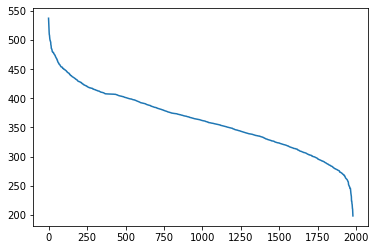

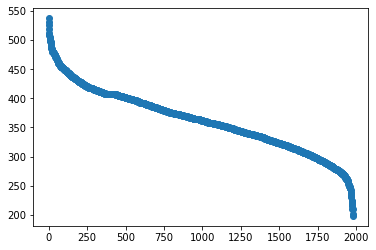

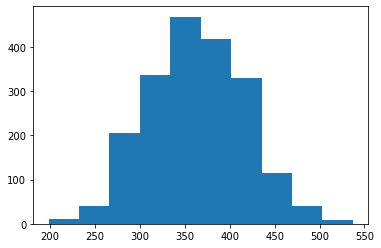

[0, 47, 28, 46, 25, 23, 4, 22, 53, 5, 19, 24, 40, 21, 8, 32, 37, 2, 45, 15, 9, 43, 56, 30, 16, 35, 7, 41, 52, 33, 44, 1, 14, 36, 3, 39, 54, 34, 27, 20, 55, 17, 11, 49, 31, 6, 48, 42, 13, 50, 29, 51, 38, 18, 26, 12, 10] is the shortest path after running 10000 times with a path length of 198.21209887140927


In [404]:
#visualization of success times/paths of different implementations, plot of shortest path found
hbd = simulated_annealing(distanceDict, 10000)

# print(hbd)
plt.plot(range(len(hbd[1])), hbd[1])
plt.show();

plt.scatter(range(len(hbd[1])), hbd[1])
plt.show();

plt.hist(hbd[1])
plt.show();

print(hbd[0], "is the shortest path after running 10000 times with a path length of", hbd[1].pop())

My temperature/probablility function performed well I think, getting me my best-shortest path cost to be 198.21. I used around 10000 iterations at the end as I felt that the more iterations I used, the closer I would get to a lower path cost. On average though, I got to around this mark with about 100ish iterations.

### Part E) Short Bonus (5 pts)

Suppose there existed a river that was very difficult to cross running along the line $x=10$ on the data set.  Adjust your edge costs so that any edge that cross this river has an added incurred cost equivalent to traveling an *additional* 10 miles.  Use your winning algorithm in Parts C/D to solve ths problem again, and as before plot the shortest path found and list its cost (distance plus any river crossings).

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Part 2: A Short Paper on Ethics and AI

Your task is to find a current event, project, or issue that relates to AI, and evaluate the ethics involved. You
must consider multiple points of view, not just your own as well as the implications that come from these points of
view.

We mentioned various ethical scenarios in class that can help you to consider your analysis. Remember in much of AI,
context is king. This can be the case in ethics also.  You may want to think about e.g. describing the types of competing loss/utility evaluations that might lead to different AI actions in the issue you choose.  You should also read about the 5 pillars of ethical standards here: https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/

Consider the effects and impacts of AI on everyday life. Some examples to consider:
- AI and Justice
- AI and Medicine
- AI and Civil Rights
- AI and Warfare
- Defining AI
- AI Regulation
- AI and Human Jobs
- AI and Privacy
- Fair AI
- AI and Misinformation

You are welcome to discuss another topic providing there is enough AI content to make it relevant.

Paper in this cell *here*

**I plan on submitting my paper to canvas as a pdf.**

Citations/bibliography *here*.  Alternatively, you may submit the paper to canvas as a .pdf.

## Technical Details

Your paper should be approximately 1000 - 1500 words.

You will then need to collect sources surrounding this scenario. These can be newspaper articles, blog posts, book chapters etc. It is always good to have more than one source, now more than ever. You are free to choose your topic around what interests you, but I recommend that you read the grading rubric
below before making a final choice. Make sure you choose a topic on which you can write a paper to earn maximum
points.

I expect this assignment to use references appropriately and all references should be in the ACM Format (see:https://www.acm.org/publications/authors/reference-formatting).

For your consideration: preliminary rubric

- (a) [10 pts] Summarize your scenario. What is the problem that is being solved and what is the method used to solve it. This should include references to where you read about it. There maybe multiple articles on the same topic saying different things, you may wish to discuss both.
- (b) [6 pts] Describe the AI involved. Why was AI the solution? Is there a human solution? If so, why was the AI solution used.
- (c) [14 pts] Discuss the Ethical considerations of this scenario. If there is more than one side to the argument you should consider them all. (For almost all studies there will be multiple viewpoints). I recommend using the moral frameworks discussed in class to break down the scenario, either through analysing Moral Intensity of the five aspects of the Markkula Framework.
- (d) [6 pts] Discuss the Implications of this case study. How do the actions taken impact the future? What ethical debate can you forsee in the future?
- (e) [6 pts] Discuss how this case study relates to Ethics in AI as a whole. Is this case study representative? atypical? Somewhere in the middle? Why?
- (f) [4 pts] Conclude your paper, there should be a take home message. If you wish to include a personal opinion, this is the section in which to do that
There will also be points for:
- (g) [2 pt] Presentation, Spelling and Grammar
- (h) [2 pt] Appropriate Referencing

<br>

---
[Back to top](#top)
<a id='bot'></a>